# Exercise 08 Clustering II

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [ ]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## Part 2. Hierarchical clustering

This part we will perform clustering on a customer dataset provided by a mall. You can find the `Mall_Customers.csv` on the Learn platform. The goal is to obtain a hierarchy of clusters using agglomerative clustering algorithm.

### Load the dataset

Download the `Mall_Customers.csv` and load it.

In [140]:
# load dataset
df = pd.read_csv('Mall Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data exploration

We won't repeat the data exploration step since we've already done that in the last session.
The exploration resluts indicate that:
- 'CustomerID' is a unique ID that is highly correlated to the annual income, we can keep the 'Annual Income' feature and set 'CustomerID' as index
- 'Gender' is a categorical feature, there is no significant difference between different genders regards the three features in the dataset, we can delete 'Gender' from the following analysis.

### Data pre-processing

In [141]:
# set 'CustomerID' as the index of the DataFrame
df.set_index(['CustomerID'], inplace = True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [142]:
# eliminate 'Gender' from the dataset
df.drop(columns = ['Gender'], inplace = True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


### Create dendrogram with different types of linkage

We will use `scipy` to create dendrorogram with different types of linkage.
- `scipy.cluster.hierarchy.linkage` for calculating different types of linkage.
- `scipy.cluster.hierarchy.dendrogram` for generating the dendrogram given a linkage.

In [143]:
# calculate the distance matrix using different linkage criteria
X = df.values
dm_single = linkage(X, method = 'single')
dm_complete = linkage(X, method = 'complete')
dm_average = linkage(X, method = 'average')
dm_ward = linkage(X, method = 'ward')

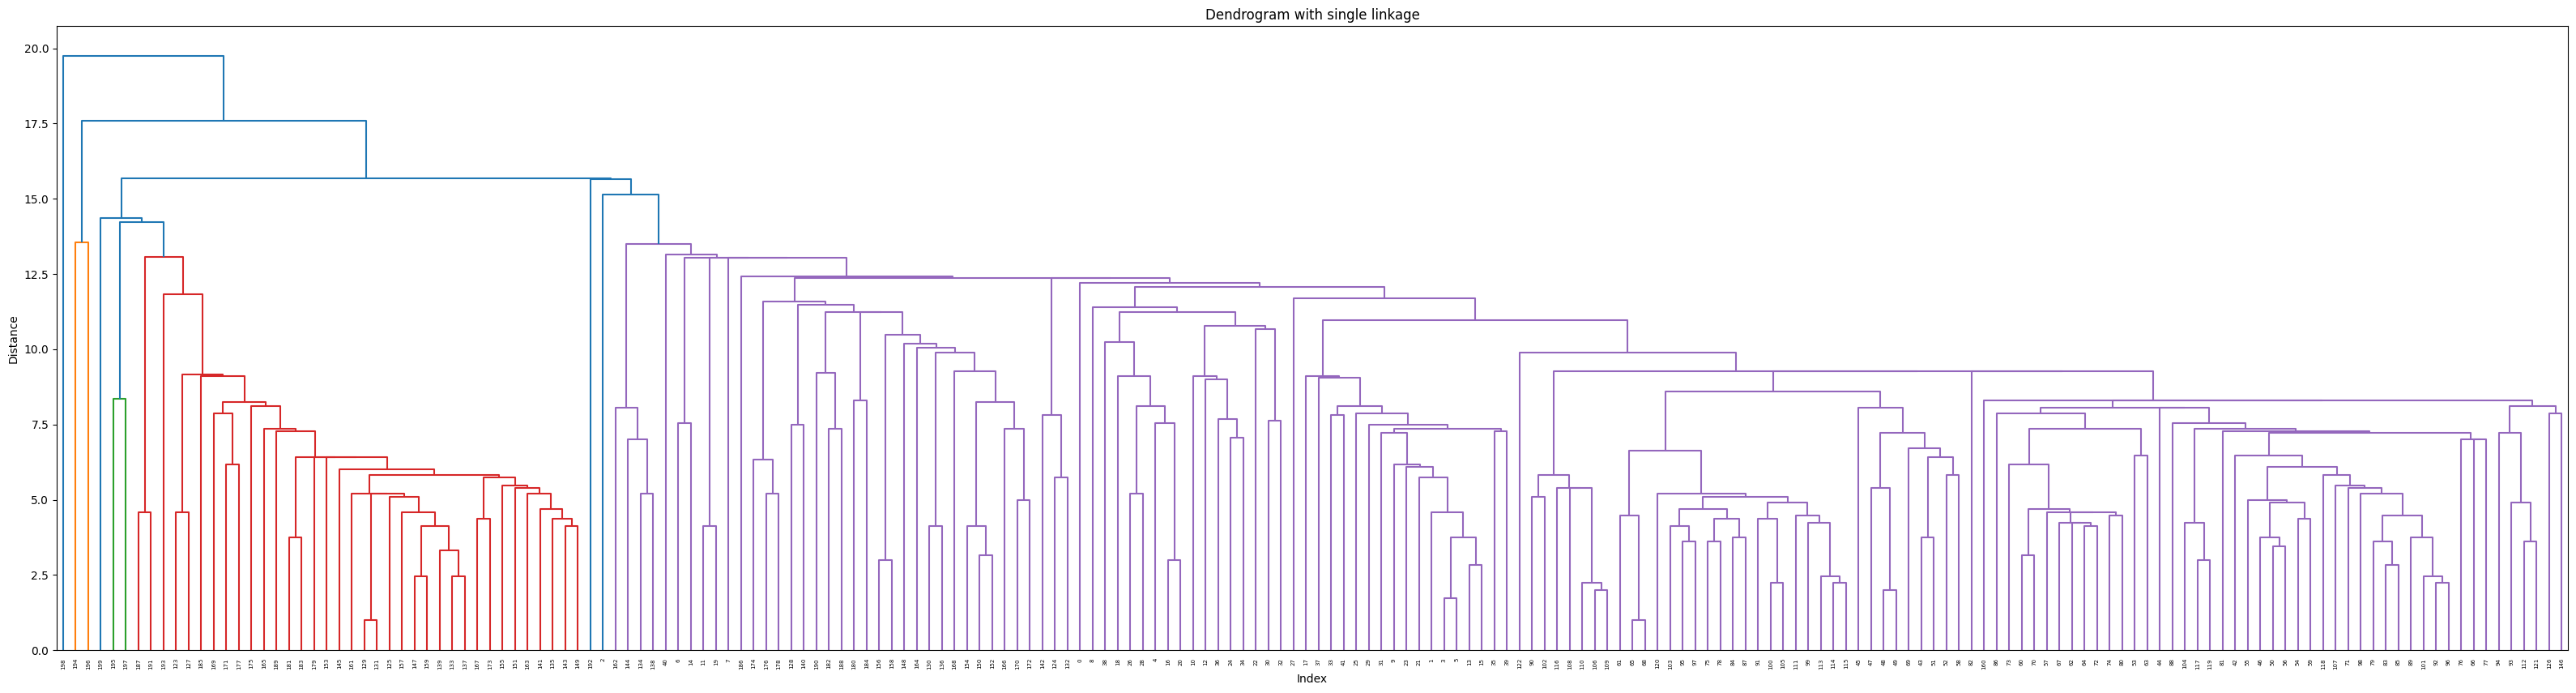

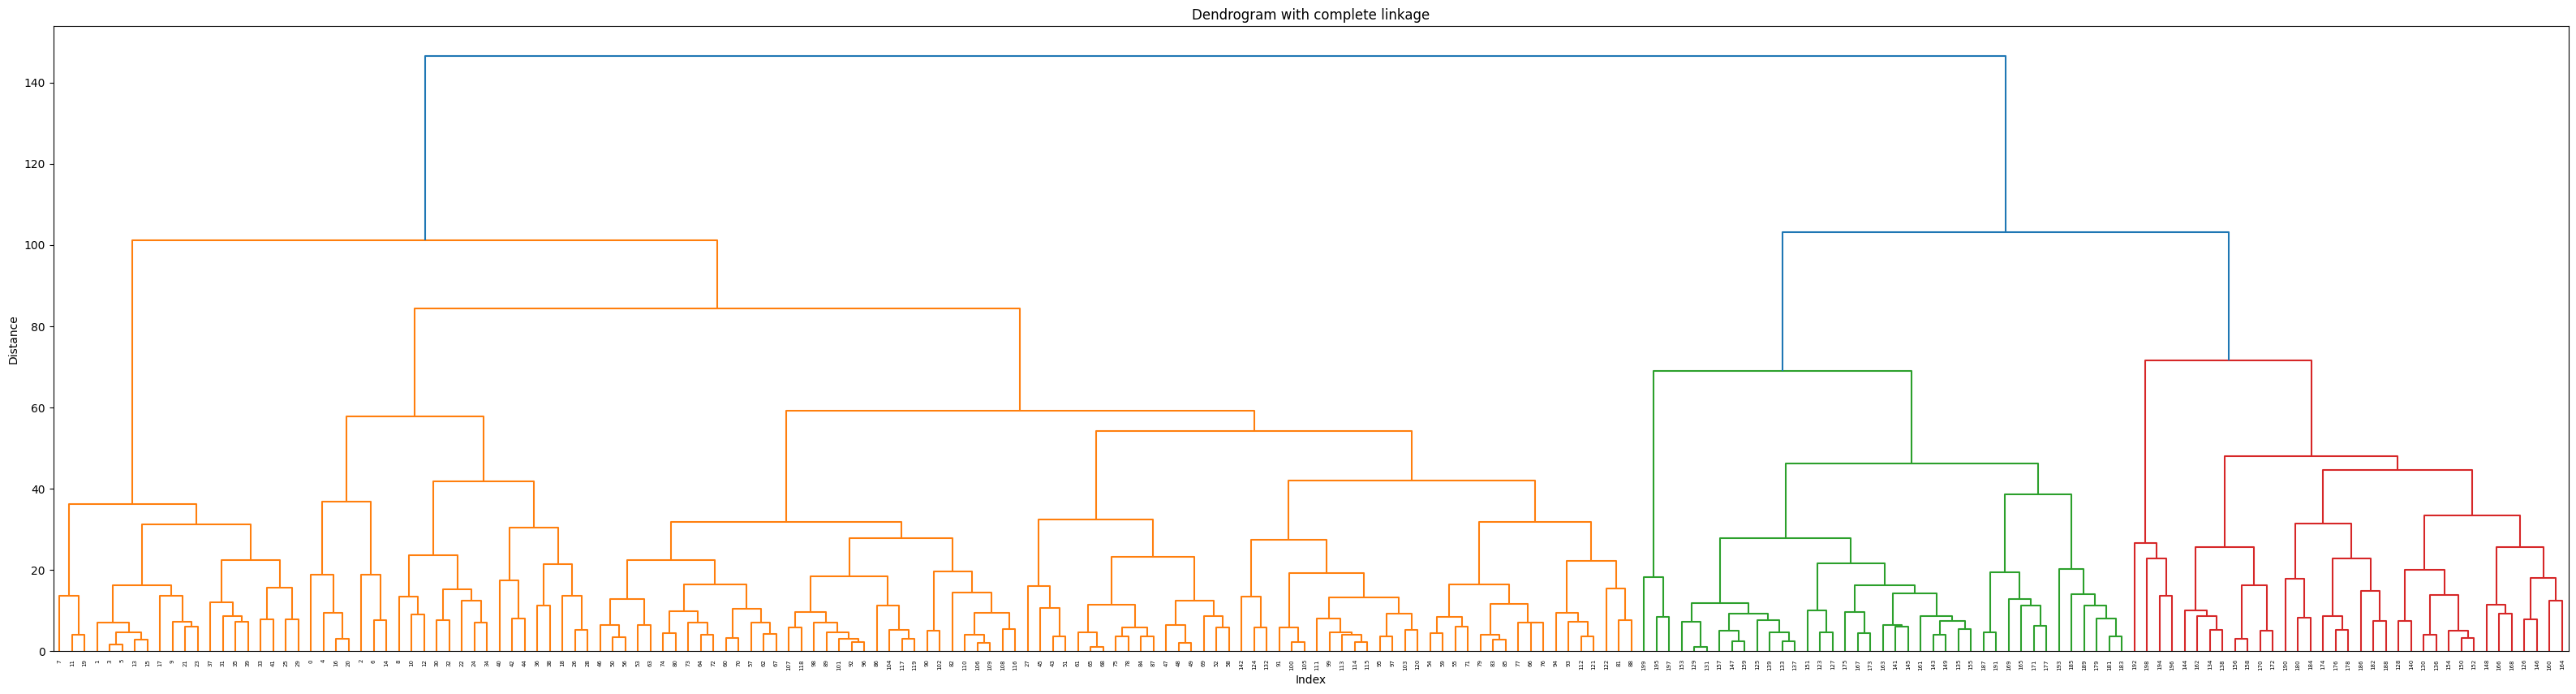

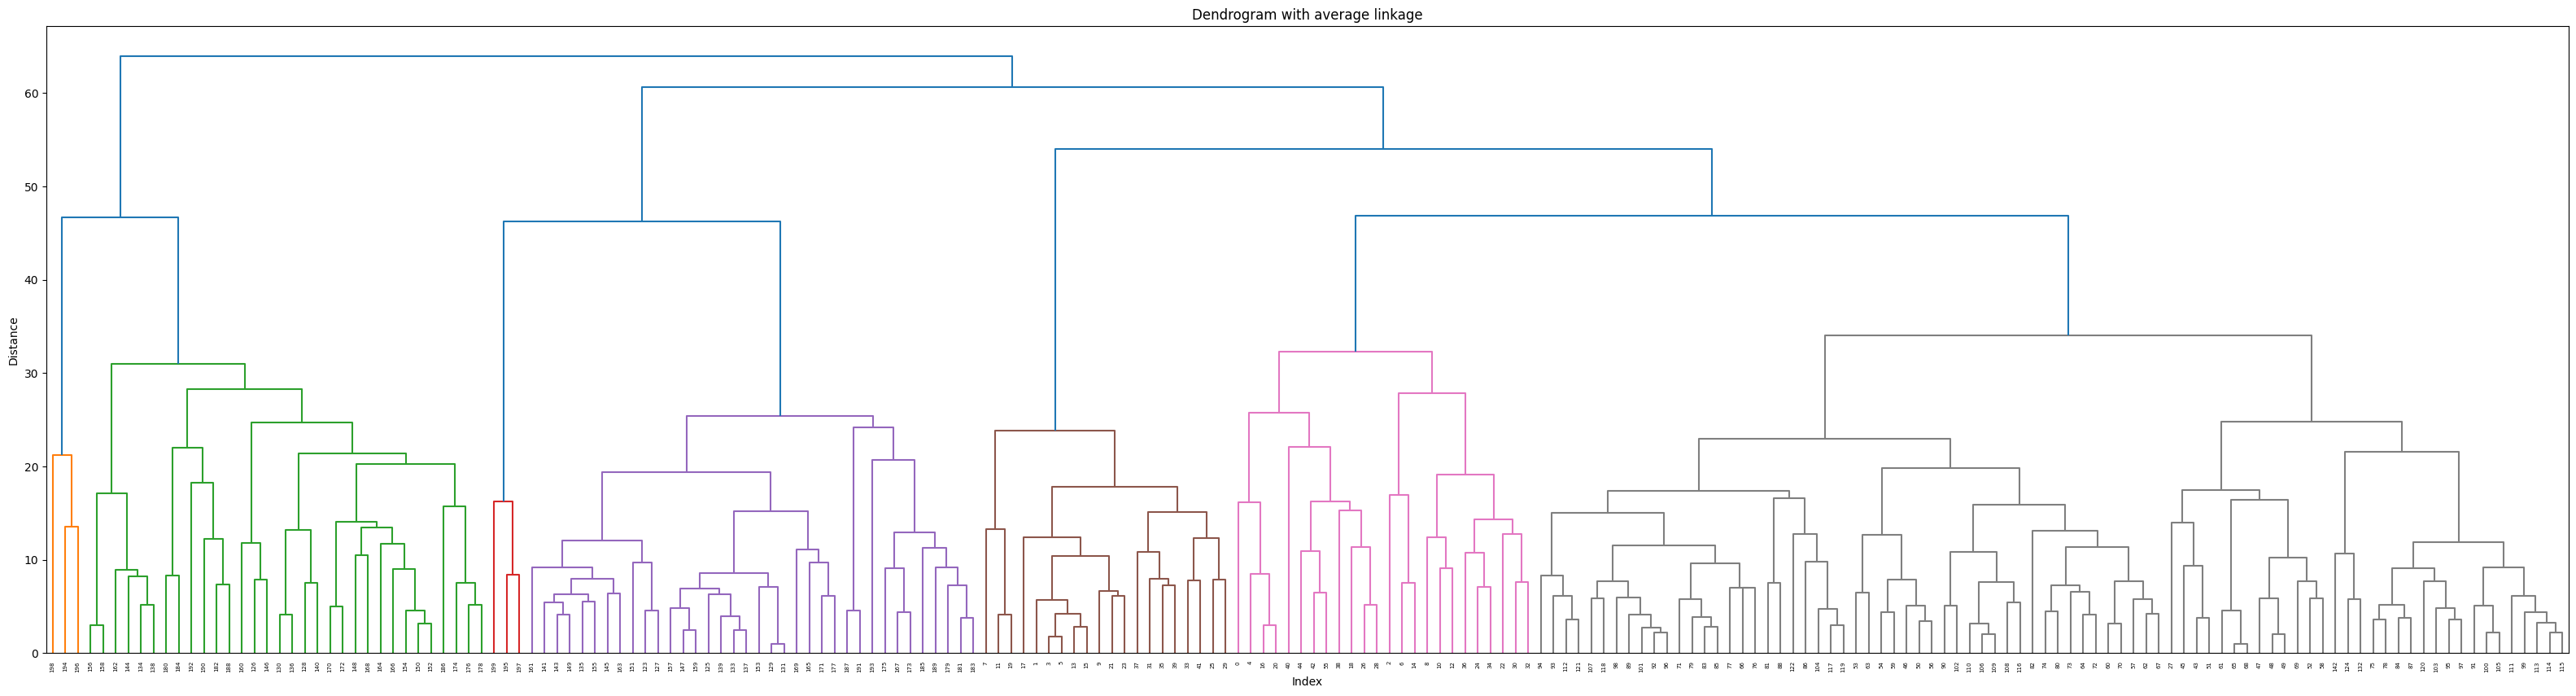

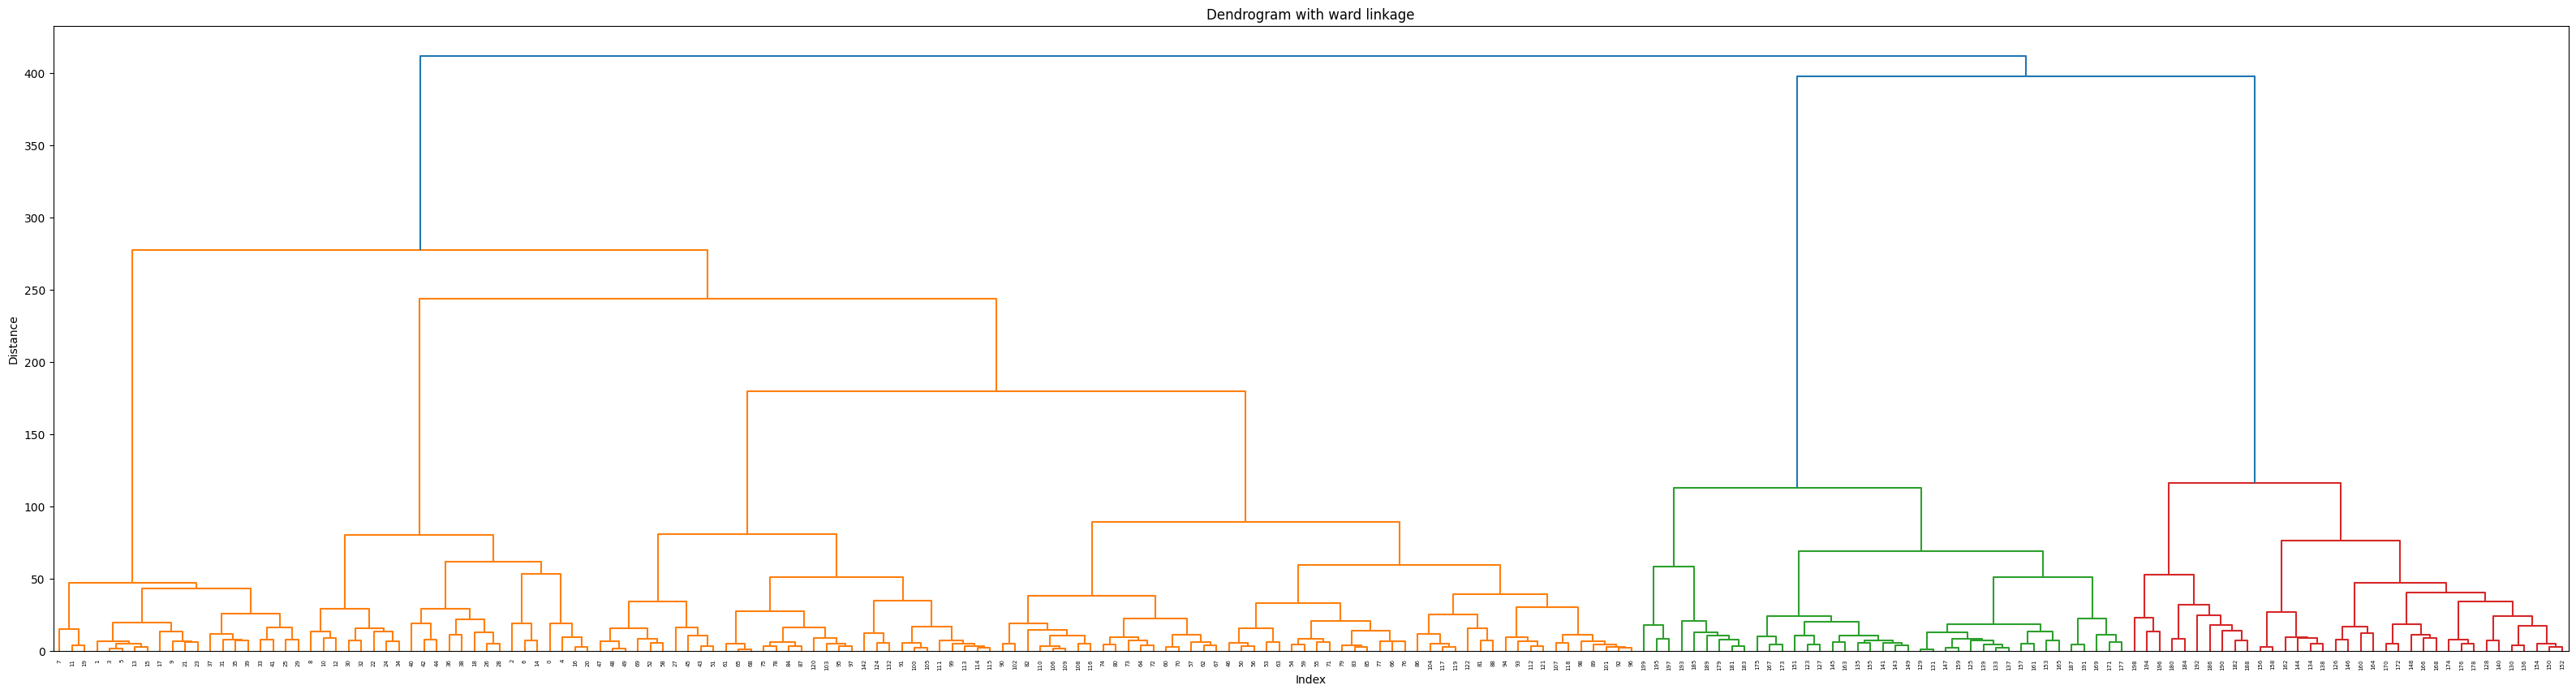

In [144]:
# full dendrogram with single linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_single)
plt.title('Dendrogram with single linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with complete linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_complete)
plt.title('Dendrogram with complete linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with average linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_average)
plt.title('Dendrogram with average linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with ward linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_ward)
plt.title('Dendrogram with ward linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

The dendrogram will show the complete tree structure. There are 200 records in our dataset, which means there will be 200 leaf nodes in the tree. Such dendrograms are too complex for visualization. We can create truncated dendrograms by merging some leaf nodes into one node. You can find more details [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

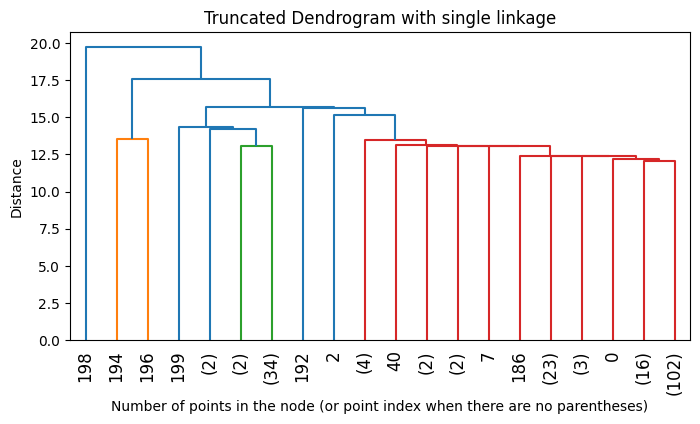

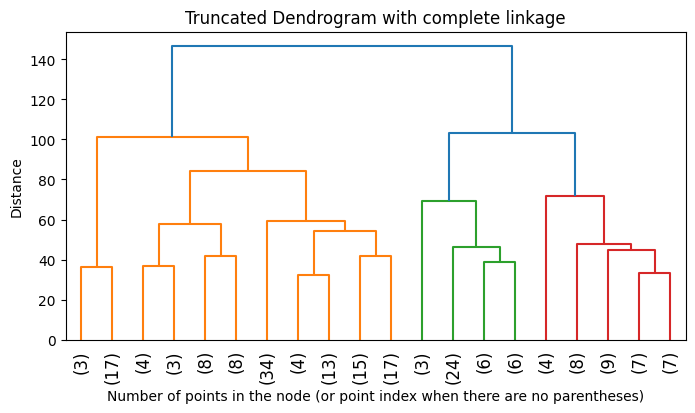

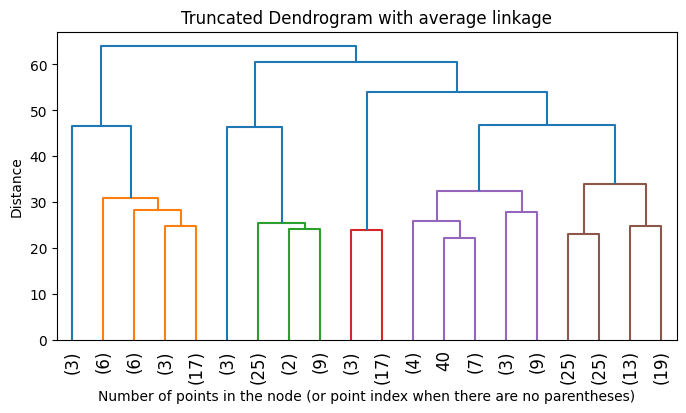

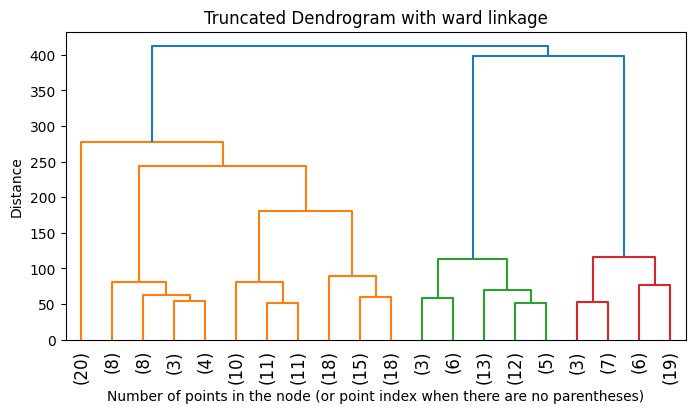

In [145]:
# truncated dendrogram with single linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_single,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with single linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with complete linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_complete,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with complete linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with average linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_average,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with average linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with ward linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_ward,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with ward linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

### Agglometative clustering with different types of linkage

We can use 'sklearn.cluster.AgglomerativeClustering' to perform agglometative clustering with different types of linkage.

In [146]:
# Agglomerative Clustering 
model_single = AgglomerativeClustering(n_clusters = 5, linkage = 'single').fit(X)
model_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(X)
model_average = AgglomerativeClustering(n_clusters = 5, linkage = 'average').fit(X)
model_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(X)

In [147]:
# obtain clustering results
labeled_df = df.copy()
labeled_df['Cluster Single'] = model_single.labels_
labeled_df['Cluster Complete'] = model_complete.labels_
labeled_df['Cluster Average'] = model_average.labels_
labeled_df['Cluster Ward'] = model_ward.labels_
labeled_df.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster Single,Cluster Complete,Cluster Average,Cluster Ward
CustomerID,,,,,,,
1,19,15,39,0,4,4,4
2,21,15,81,0,3,3,3
3,20,16,6,0,4,4,4
4,23,16,77,0,3,3,3
5,31,17,40,0,4,4,4


In [148]:
# get centroids of each clusters
# use the single linkage result as example
labeled_df[list(labeled_df.columns[:-3])].groupby(by = 'Cluster Single').mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster Single,,,
0,40.369427,52.490446,43.101911
1,32.692308,86.538462,82.128205
2,46.000000,123.000000,22.000000
3,32.000000,137.000000,18.000000
4,33.000000,113.000000,8.000000


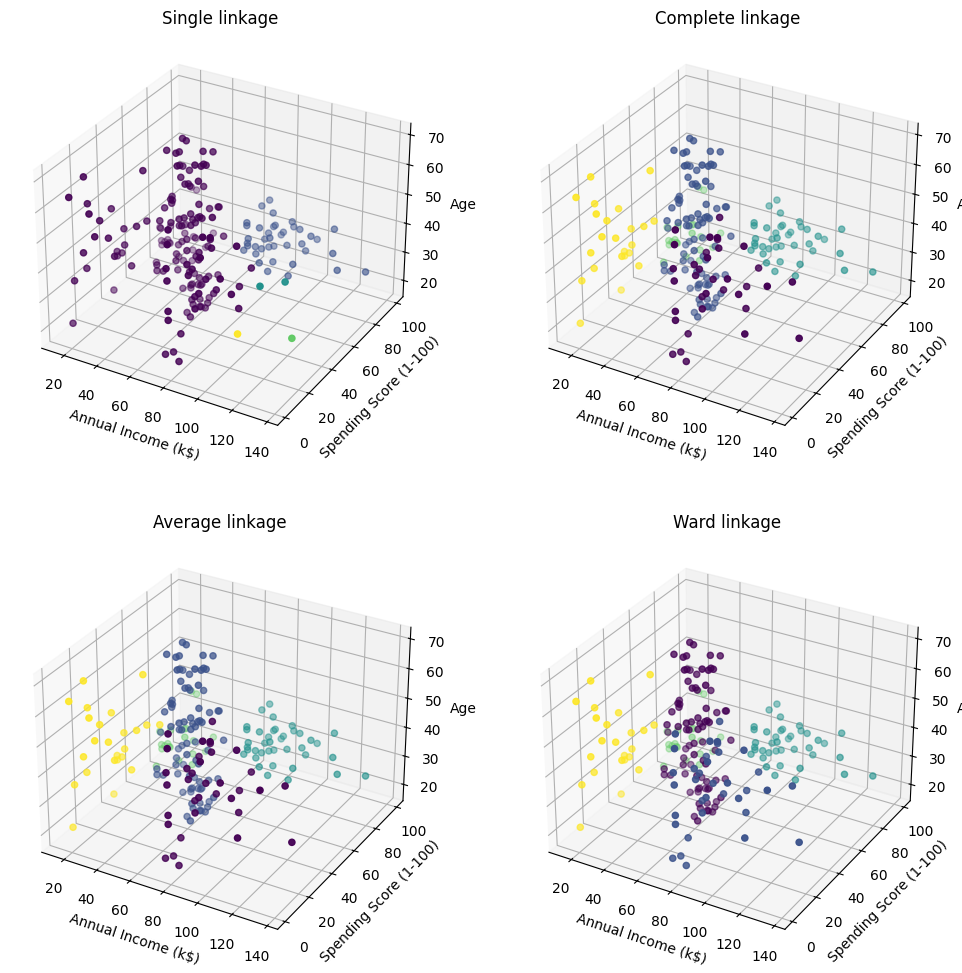

In [149]:
fig = plt.figure(figsize = [12, 12])

i = 1
subplot_title = ['Single linkage', 'Complete linkage', 'Average linkage', 'Ward linkage']
for model in [model_single, model_complete, model_average, model_ward]:
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.set_proj_type('persp')
    ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Age'], c = model.labels_)
    ax.set_title(subplot_title[i - 1])
    ax.set_xlabel('Annual Income (k$)')
    ax.set_ylabel('Spending Score (1-100)')
    ax.set_zlabel('Age')
    i += 1

plt.show()

In [150]:
# calculate the clustering quality evaluation metric
metric_df = pd.DataFrame(
    columns = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin index'],
    index = ['Single', 'Complete', 'Average', 'Ward']
)
metric_df['Silhouette Coefficient'] = [
    silhouette_score(X, model_single.labels_),
    silhouette_score(X, model_complete.labels_),
    silhouette_score(X, model_average.labels_),
    silhouette_score(X, model_ward.labels_)
]
metric_df['Calinski-Harabasz Index'] = [
    calinski_harabasz_score(X, model_single.labels_),
    calinski_harabasz_score(X, model_complete.labels_),
    calinski_harabasz_score(X, model_average.labels_),
    calinski_harabasz_score(X, model_ward.labels_)
]
metric_df['Davies-Bouldin index'] = [
    davies_bouldin_score(X, model_single.labels_),
    davies_bouldin_score(X, model_complete.labels_),
    davies_bouldin_score(X, model_average.labels_),
    davies_bouldin_score(X, model_ward.labels_)
]
metric_df

,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin index
Single,0.242942,25.859635,0.631173
Complete,0.440189,147.672413,0.821672
Average,0.435421,146.613891,0.834278
Ward,0.440189,147.672413,0.821672


### Select the optimal distance threshold for agglomerative clustering

Let's use ward linkage as example.

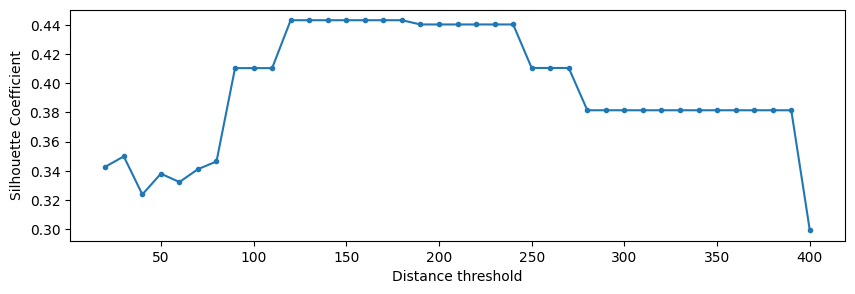

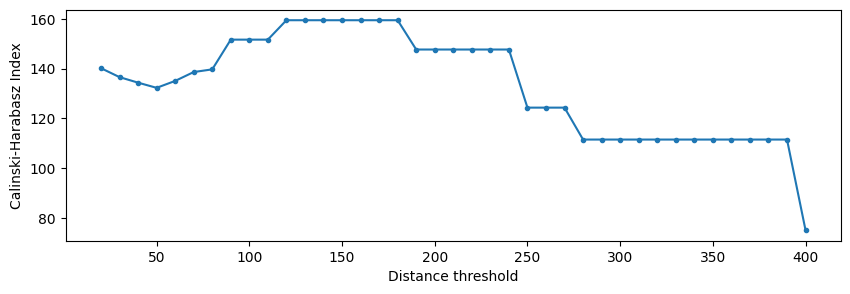

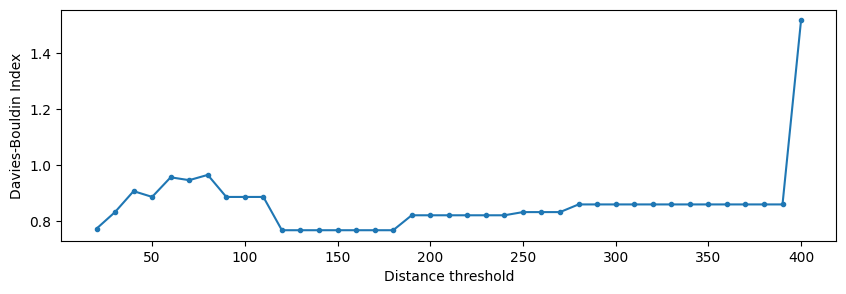

In [151]:
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for threshold in range(20, 401, 10):
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = threshold).fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), silhouette, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), calinski_harabasz, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), davies_bouldin, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Davies-Bouldin Index')
plt.show()

From the above figures, a distance threshold around 150 gives the best metric values.

In [152]:
# get the number of clusters when distance threshold = 150
model_ward = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = 150).fit(X)
print("Number of clusters:", model_ward.n_clusters_)

Number of clusters: 6


### Select the optimal number of clusters instead of distance threshold

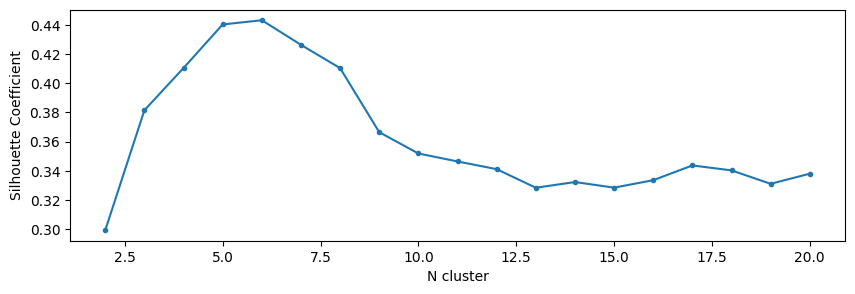

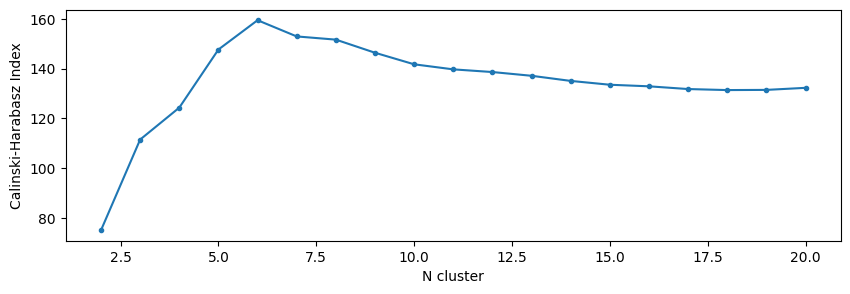

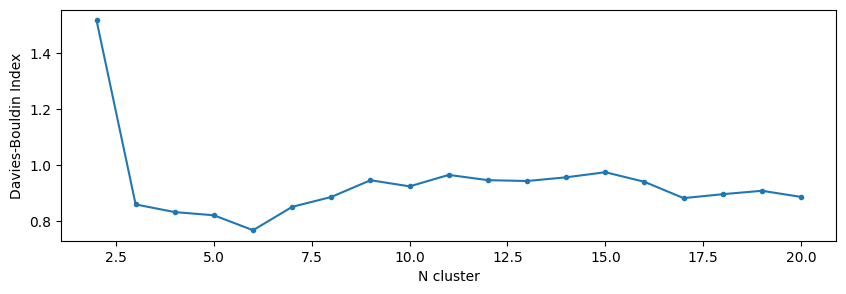

In [153]:
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for n in range(2, 21):
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = n, linkage = 'ward').fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), silhouette, '.-')
plt.xlabel('N cluster')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), calinski_harabasz, '.-')
plt.xlabel('N cluster')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), davies_bouldin, '.-')
plt.xlabel('N cluster')
plt.ylabel('Davies-Bouldin Index')
plt.show()

The above figures also show that six is the optimal number of clusters.

## Part 2. Hands-on Exercise

In this exercise, we will perform hierarchical clustering with the [APP User Behavior dataset](https://www.kaggle.com/datasets/bhanupratapbiswas/app-users-segmentation-case-study). Please download `App_User_Behavior.csv` from the Learn platform.

This dataset records a list of features that characterize the user behavior when using an app.

We will perform clustering with this dataset to build a hierarchy of clusters among different users based on their behavior pattern.

### Task 1. Load and explore the dataset

<span style="color:red">**[TBC]**</span> Load the dataset and perform data exploration to see if there is a need for:
- Eliminate records with missing-values
- Eliminate highly correlated features
- Eliminate irrelevant / useless features
- Feature scaling
- Eliminate outliers

In [154]:
# [TBC] complete your code here with proper comments
df = pd.read_csv('App User Behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      999 non-null    int64  
 1   Average Screen Time         999 non-null    float64
 2   Average Spent on App (INR)  999 non-null    float64
 3   Left Review                 999 non-null    int64  
 4   Ratings                     999 non-null    int64  
 5   New Password Request        999 non-null    int64  
 6   Last Visited Minutes        999 non-null    int64  
 7   Status                      999 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.6+ KB


In [155]:
df.set_index(['userid'],inplace=True)
df.head()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
userid,,,,,,,
1001,17.0,634.0,1,9,7,2990,Installed
1002,0.0,54.0,0,4,8,24008,Uninstalled
1003,37.0,207.0,0,8,5,971,Installed
1004,32.0,445.0,1,6,2,799,Installed
1005,45.0,427.0,1,5,6,3668,Installed


In [156]:
df['Status'] = df['Status'].replace({'Installed':1,'Uninstalled':0})
df['Status'].head()

/var/folders/12/4xknp3ds50l867z9m2bm4xpr0000gn/T/ipykernel_34209/2076534938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status'] = df['Status'].replace({'Installed':1,'Uninstalled':0})


userid
1001    1
1002    0
1003    1
1004    1
1005    1
Name: Status, dtype: int64

In [157]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap='coolwarm')

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
Average Screen Time,1.000000,0.445920,-0.019984,0.557624,-0.261706,-0.458216,0.467834
Average Spent on App (INR),0.445920,1.000000,-0.022998,0.482451,-0.207935,-0.350524,0.359042
Left Review,-0.019984,-0.022998,1.000000,0.003547,0.056722,-0.004401,0.016627
Ratings,0.557624,0.482451,0.003547,1.000000,-0.213145,-0.416936,0.442731
New Password Request,-0.261706,-0.207935,0.056722,-0.213145,1.000000,0.464466,-0.510563
Last Visited Minutes,-0.458216,-0.350524,-0.004401,-0.416936,0.464466,1.000000,-0.916728
Status,0.467834,0.359042,0.016627,0.442731,-0.510563,-0.916728,1.000000


In [158]:
df.describe()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Status
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,24.390390,424.415415,0.497497,6.513514,4.941942,5110.898899,0.916917
std,14.235415,312.365695,0.500244,2.701511,2.784626,8592.036516,0.276146
min,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,0.000000
25%,12.000000,96.000000,0.000000,5.000000,3.000000,1495.500000,1.000000
50%,24.000000,394.000000,0.000000,7.000000,5.000000,2865.000000,1.000000
75%,36.000000,717.500000,1.000000,9.000000,7.000000,4198.000000,1.000000
max,50.000000,998.000000,1.000000,10.000000,15.000000,49715.000000,1.000000


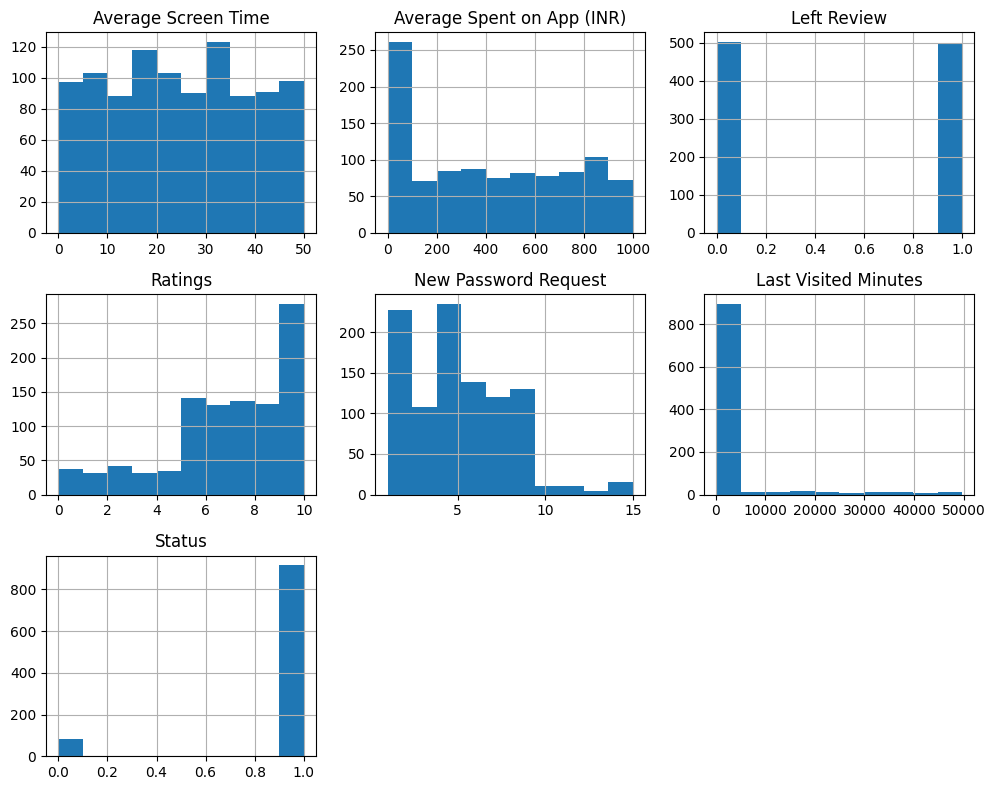

In [159]:
df.hist(figsize=(10,8),bins=10)

plt.tight_layout()
plt.show()

<Axes: >

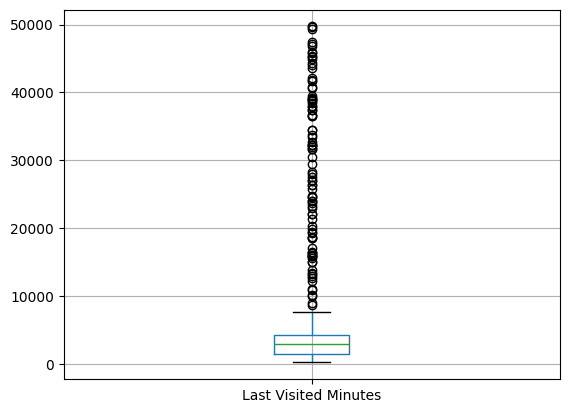

In [160]:
# Seem like 'Last Visited Minutes' have a big amount of outliers.
df.boxplot(column='Last Visited Minutes')


### Conclusion:
From this data exploration have been concluded to transform the data as follow:
1. Eliminate the 'Status' column as it is irrelevant.

2. Eliminate the outliers of Last Visited Minutes.

3. Scale all the features.

### Task 2. Data pre-processing

<span style="color:red">**[TBC]**</span> Depending on the conclusions you got from data exploration, preproces the dataset.

#### 1. Eliminate the 'Status' column as it is irrelevant.

In [161]:
# Status column is irrelevant for the analysis.
df = df.drop(columns='Status')

#### 2. Eliminate the outliers of Last Visited Minutes.

In [162]:
from scipy.stats import zscore

zscore_df = df.copy()
zscore_df['ZScore_LVM'] = zscore(df['Last Visited Minutes'])

outliers = zscore_df[(abs(zscore_df['ZScore_LVM']) > 3)]

print(outliers['Last Visited Minutes'])


userid
1039    37959
1044    49334
1047    39016
1065    40868
1087    42101
1094    33465
1100    41859
1147    40603
1151    31724
1182    43650
1184    38744
1213    38821
1220    49715
1268    36469
1328    45339
1336    47187
1353    49696
1379    39153
1395    37826
1406    32302
1439    37453
1469    47412
1476    31950
1477    45979
1492    38457
1502    45265
1548    36478
1561    46826
1572    37474
1573    44275
1585    44883
1741    34395
1759    32265
1787    38966
1807    44107
1846    41664
1850    31644
1856    34445
1863    32253
1917    36725
1927    33692
1944    32762
1979    45734
1980    39494
Name: Last Visited Minutes, dtype: int64


In [163]:
zscore_df = zscore_df[~(zscore_df['ZScore_LVM'] > 3)]
zscore_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955 entries, 1001 to 1999
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average Screen Time         955 non-null    float64
 1   Average Spent on App (INR)  955 non-null    float64
 2   Left Review                 955 non-null    int64  
 3   Ratings                     955 non-null    int64  
 4   New Password Request        955 non-null    int64  
 5   Last Visited Minutes        955 non-null    int64  
 6   ZScore_LVM                  955 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 59.7 KB


<Axes: >

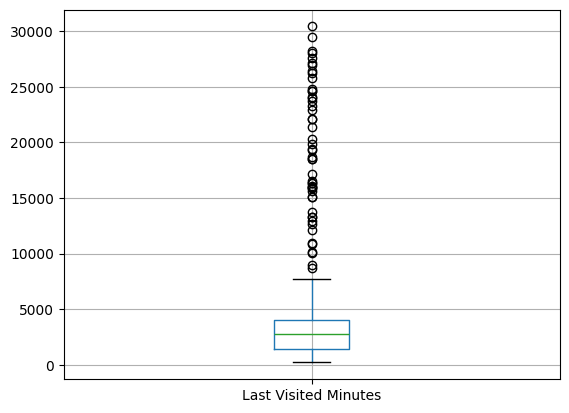

In [164]:
zscore_df.boxplot(column='Last Visited Minutes')


In [165]:
# Define a function to perform IQR-based filtering
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 3 * IQR  # Lower bound for outlier detection
        upper_bound = Q3 + 3 * IQR  # Upper bound for outlier detection

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Specify the columns to check for outliers
columns_to_check = ['Last Visited Minutes','New Password Request']

# Apply the IQR method
cleaned_df = remove_outliers_iqr(df, columns_to_check)

# Display the cleaned DataFrame
cleaned_df.describe()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,26.521405,460.380900,0.500549,6.894621,4.513721,2683.738749
std,13.051350,303.665488,0.500274,2.466007,2.298967,1593.282806
min,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,16.000000,171.500000,0.000000,5.000000,3.000000,1392.000000
50%,26.000000,459.000000,1.000000,7.000000,5.000000,2601.000000
75%,37.000000,739.000000,1.000000,9.000000,6.000000,3934.000000
max,50.000000,998.000000,1.000000,10.000000,8.000000,12163.000000


<Axes: >

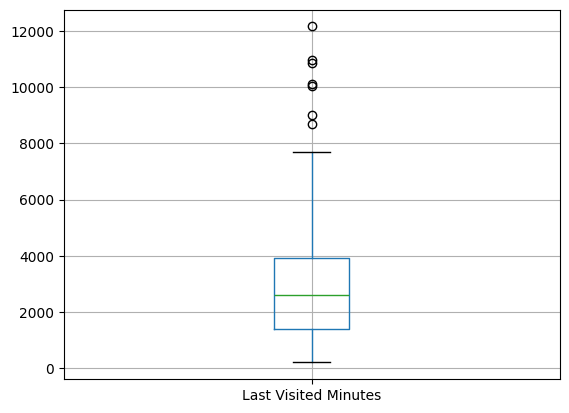

In [166]:
cleaned_df.boxplot(column='Last Visited Minutes')


In [167]:

# calculate the 1% and 99% quantiles to locate the extremly small or large values

quantiles_1 = df['Last Visited Minutes'].quantile(0.01)
quantiles_99 = df['Last Visited Minutes'].quantile(0.99)

print(quantiles_1)
print(quantiles_99)

# eliminate extremly small or large values
#for column in preprocessed_data_df.columns:
preprocessed_data_df = df[
    (df['Last Visited Minutes'] > quantiles_1) &
    (df['Last Visited Minutes'] < quantiles_99)
    ]

print("The number of outliers that are eliminated:", len(df) - len(preprocessed_data_df))

252.98
44890.63999999999
The number of outliers that are eliminated: 20


In [168]:
preprocessed_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 979 entries, 1001 to 1999
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average Screen Time         979 non-null    float64
 1   Average Spent on App (INR)  979 non-null    float64
 2   Left Review                 979 non-null    int64  
 3   Ratings                     979 non-null    int64  
 4   New Password Request        979 non-null    int64  
 5   Last Visited Minutes        979 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 53.5 KB


<Axes: >

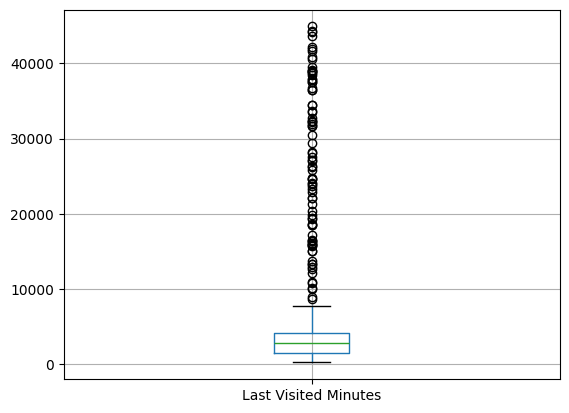

In [169]:
preprocessed_data_df.boxplot(column='Last Visited Minutes')

In [170]:
final_df = zscore_df.copy()
final_df = final_df.drop(columns='ZScore_LVM')
final_df.describe()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
count,955.000000,955.000000,955.000000,955.000000,955.000000,955.000000
mean,25.402094,441.526702,0.495288,6.677487,4.728796,3513.464921
std,13.732988,308.814841,0.500240,2.627596,2.562174,4229.356797
min,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000
25%,14.000000,135.500000,0.000000,5.000000,3.000000,1437.500000
50%,25.000000,423.000000,0.000000,7.000000,5.000000,2754.000000
75%,36.000000,727.500000,1.000000,9.000000,7.000000,4058.500000
max,50.000000,998.000000,1.000000,10.000000,15.000000,30435.000000


#### 3. Scale all the features.

Why was it used the MinMaxScaler?

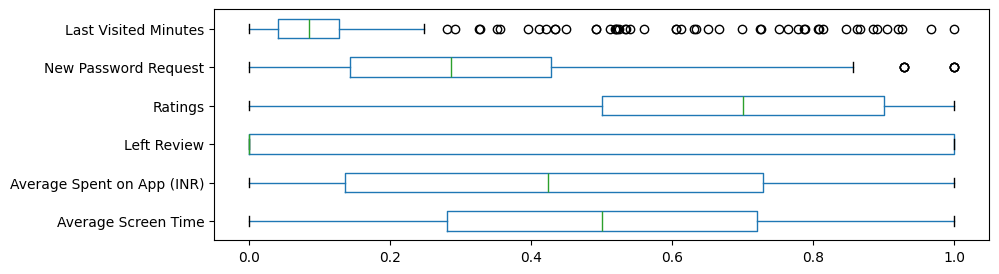

In [171]:
# feature scaling
scaler = MinMaxScaler()

final_df = pd.DataFrame(
    scaler.fit_transform(final_df.values),
    columns = final_df.columns
)
final_df.boxplot(
    grid = False,
    figsize = (10, 3),
    vert = False
)
plt.show()

### Task 3. Create dendrogram with different types of linkage

<span style="color:red">**[TBC]**</span> Use `scipy` to create dendrogram with different types of linkage.

In [172]:
# [TBC] complete your code here with proper comments
# calculate the distance matrix using different linkage criteria
X = final_df.values
dm_single = linkage(X, method = 'single')
dm_complete = linkage(X, method = 'complete')
dm_average = linkage(X, method = 'average')
dm_ward = linkage(X, method = 'ward')

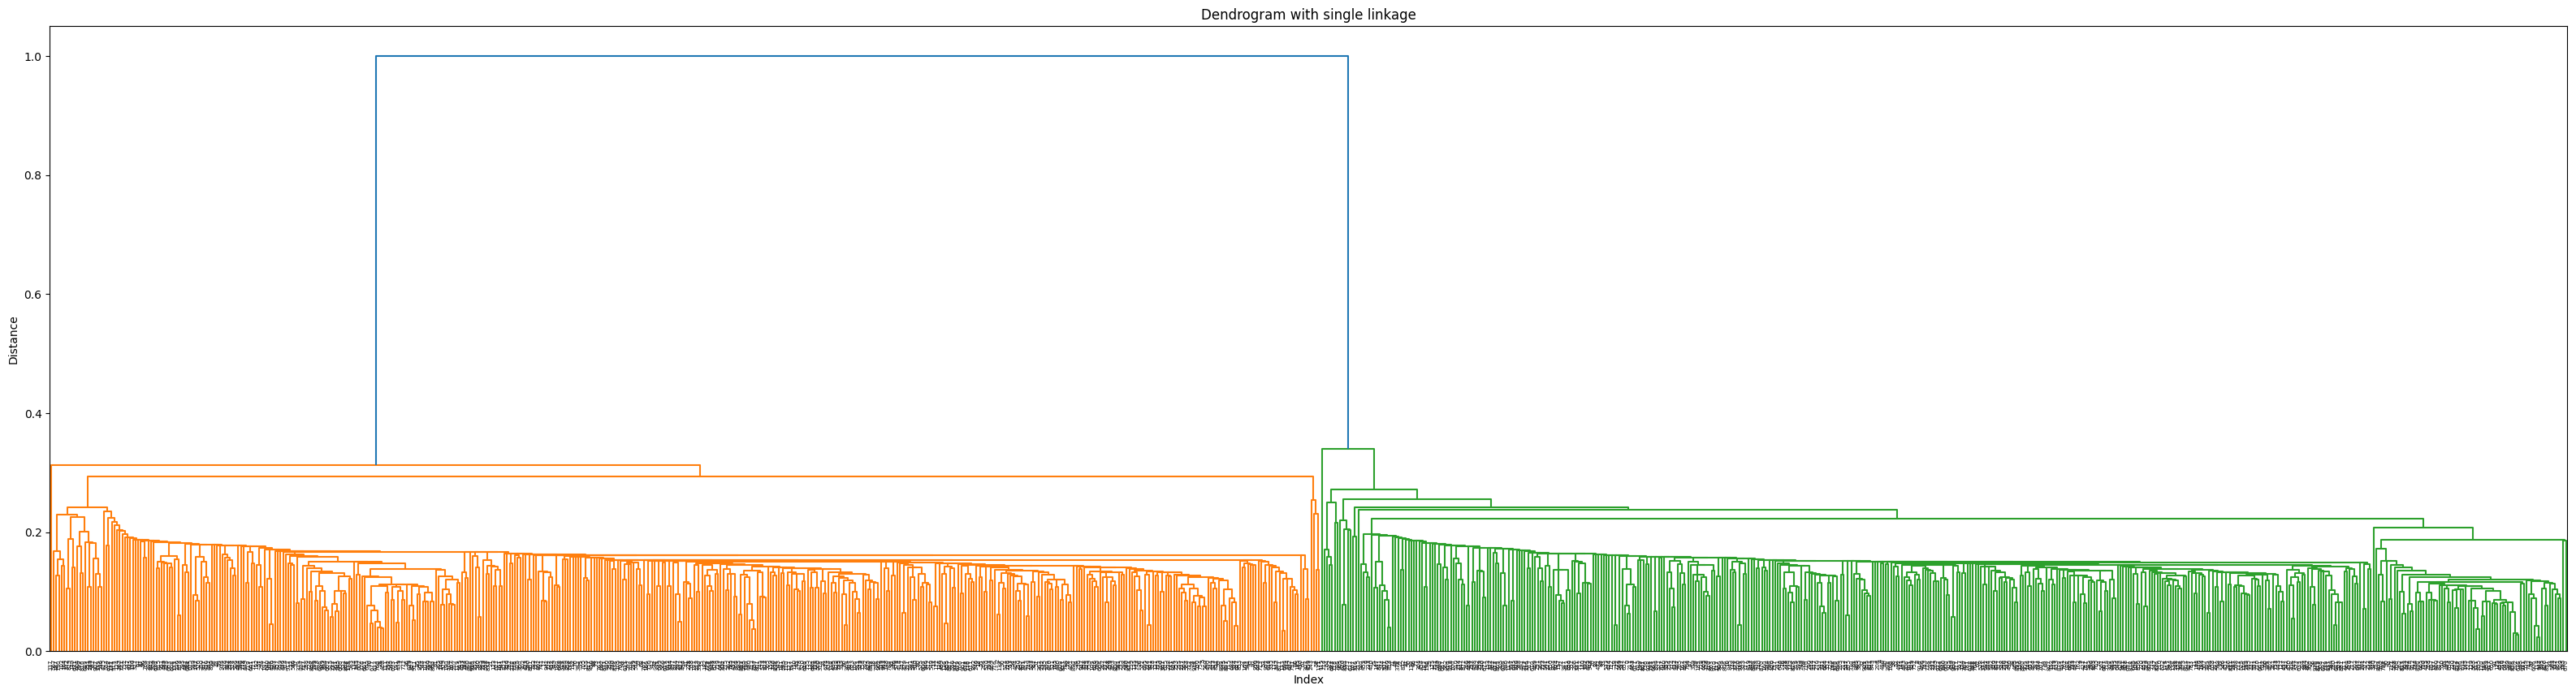

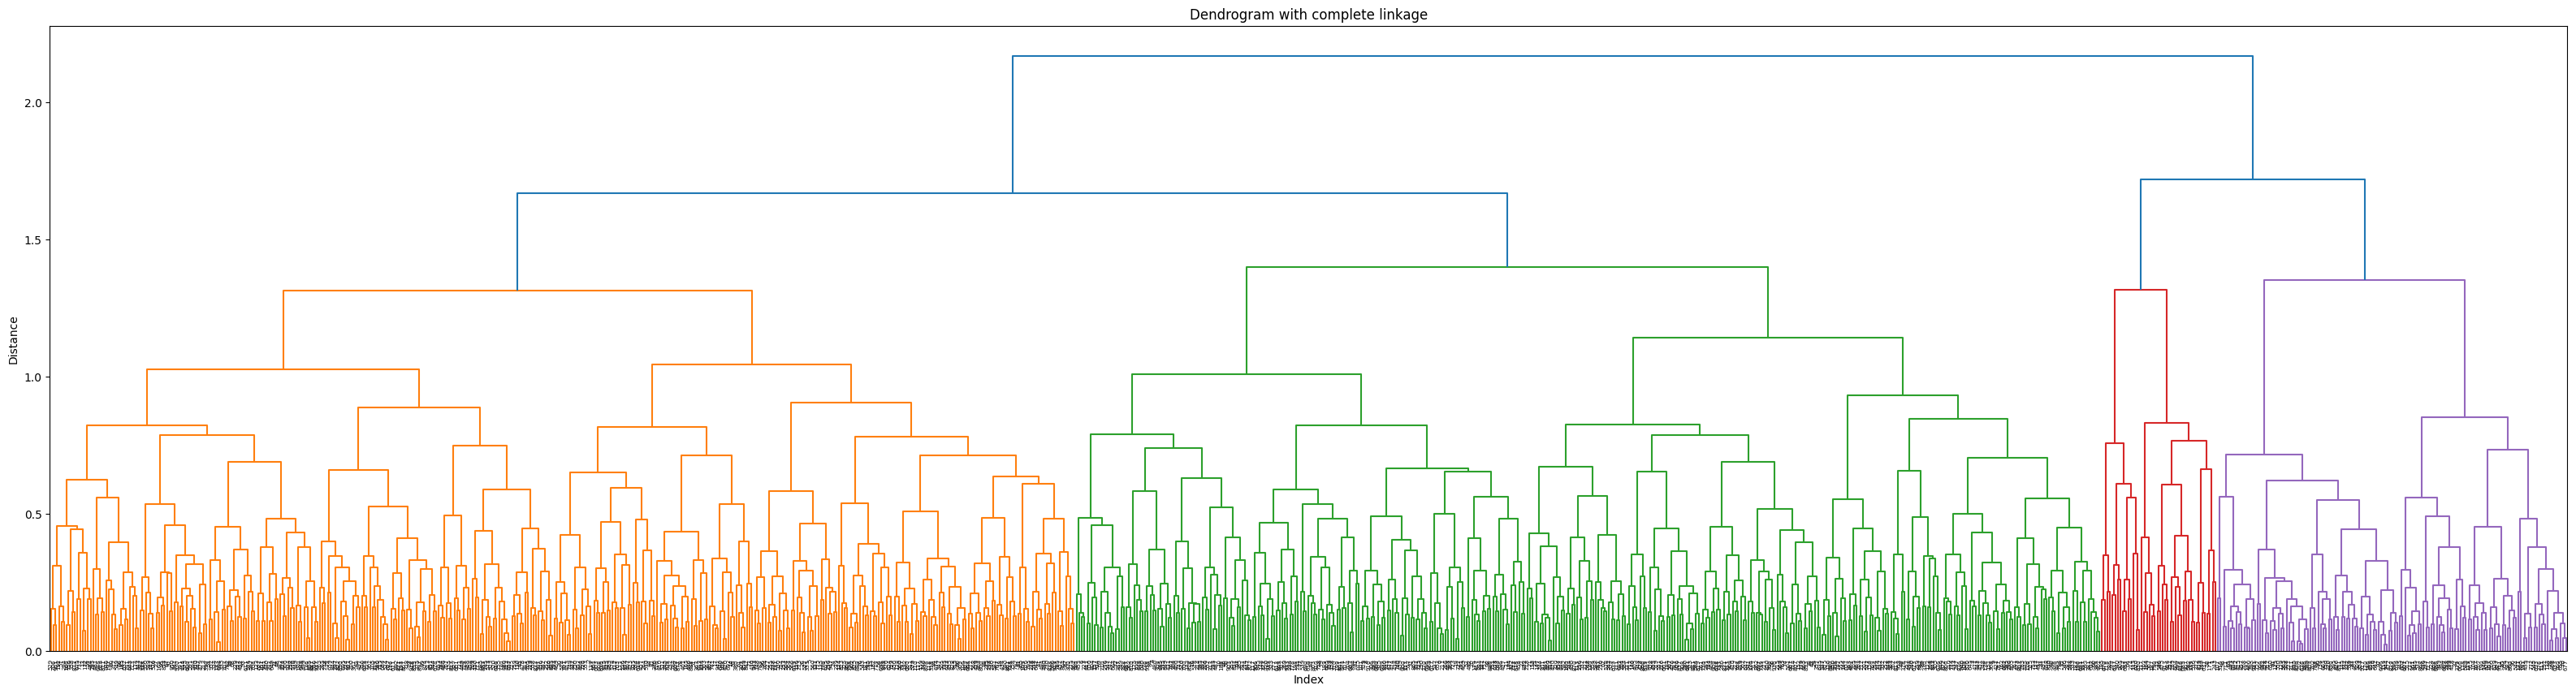

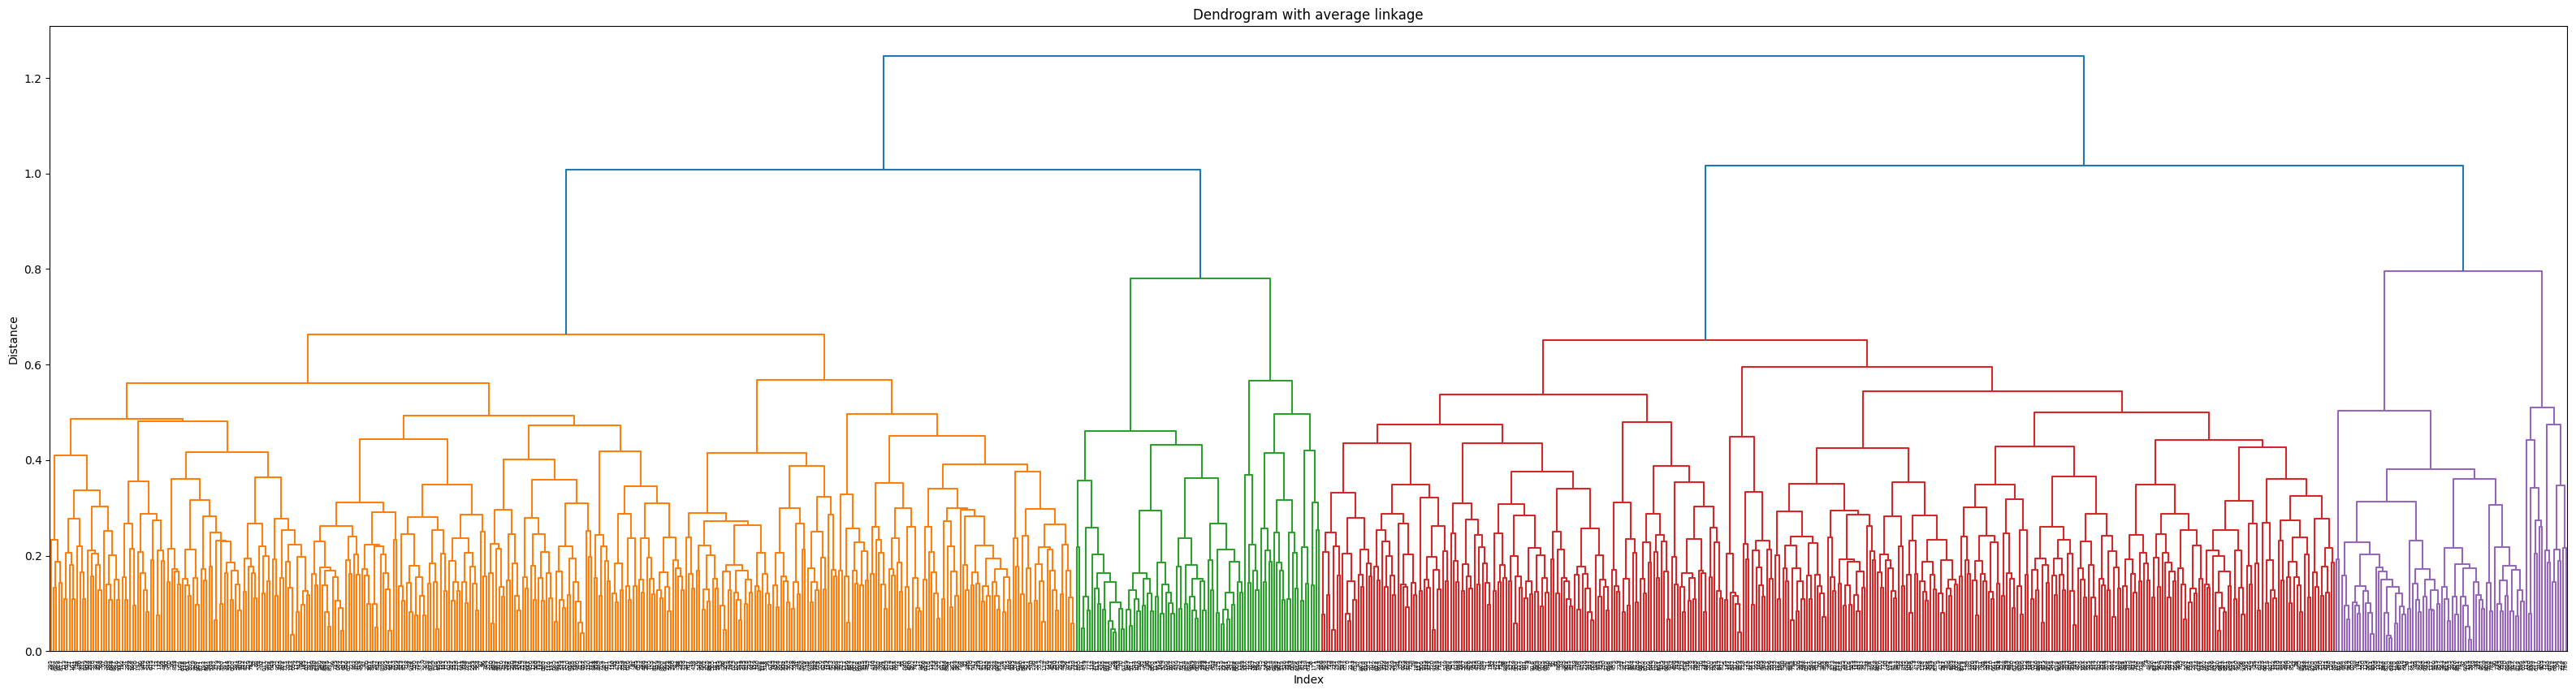

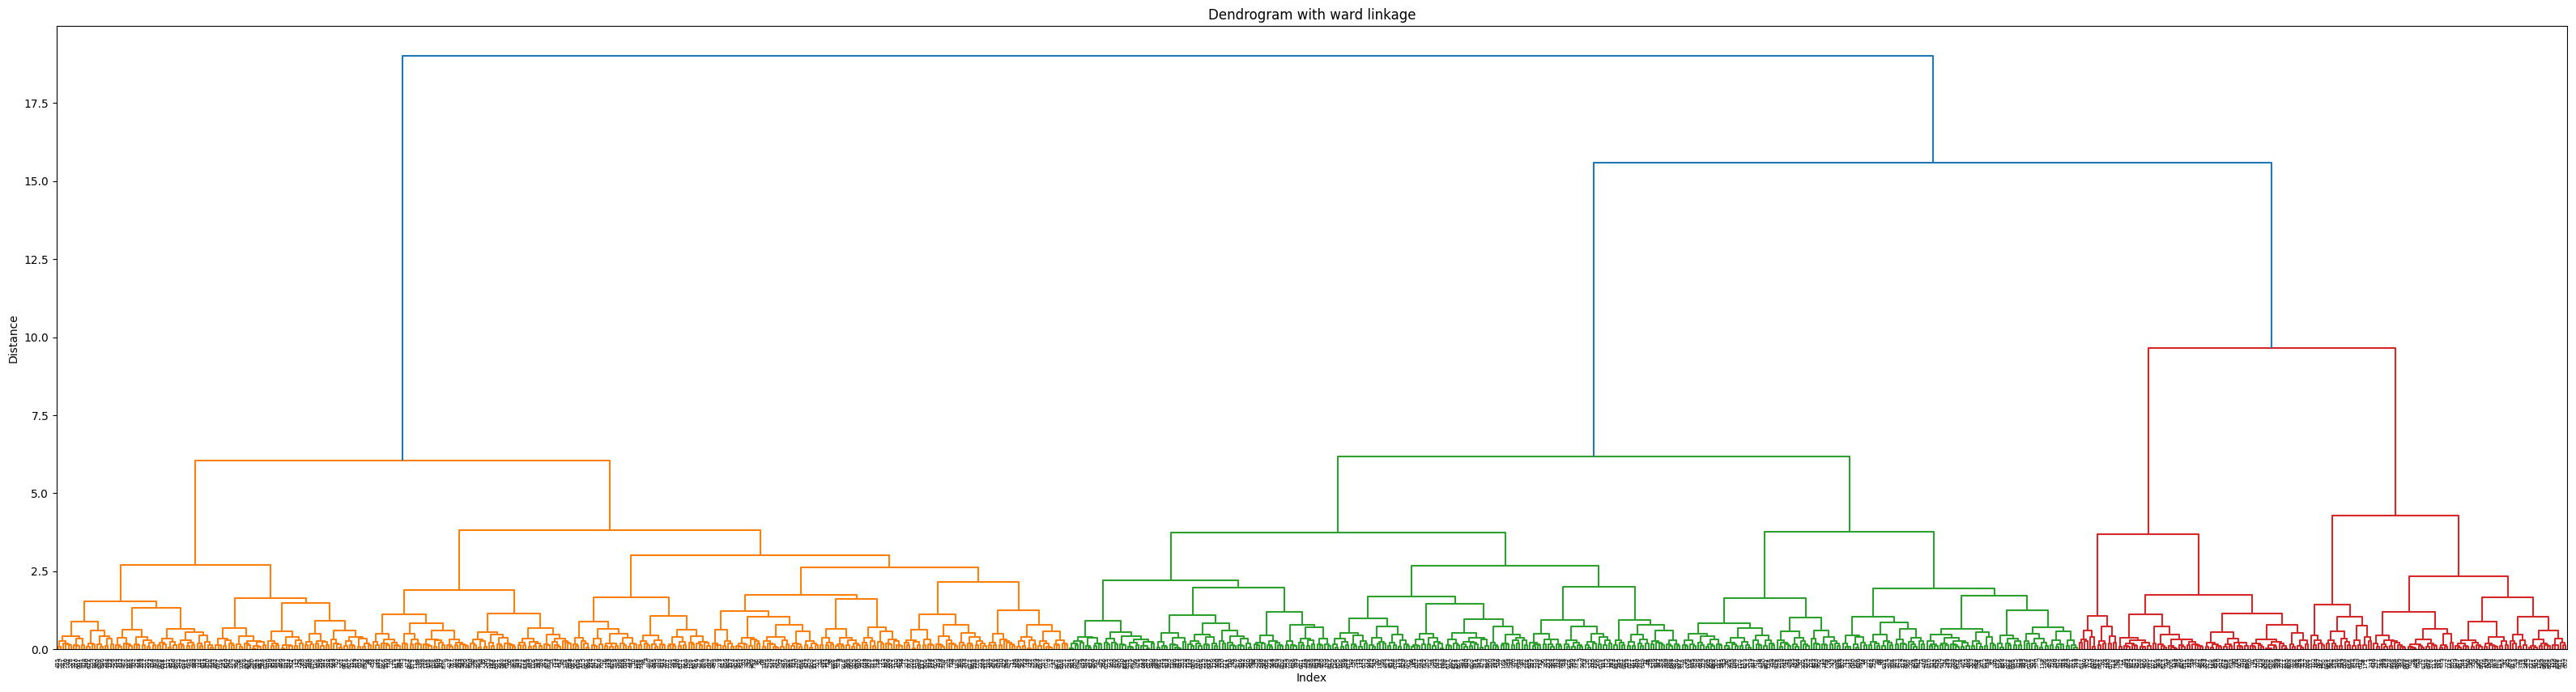

In [173]:
# full dendrogram with single linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_single)
plt.title('Dendrogram with single linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with complete linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_complete)
plt.title('Dendrogram with complete linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with average linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_average)
plt.title('Dendrogram with average linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

# full dendrogram with ward linkage
plt.figure(figsize = (40, 10))
dendrogram(Z = dm_ward)
plt.title('Dendrogram with ward linkage')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

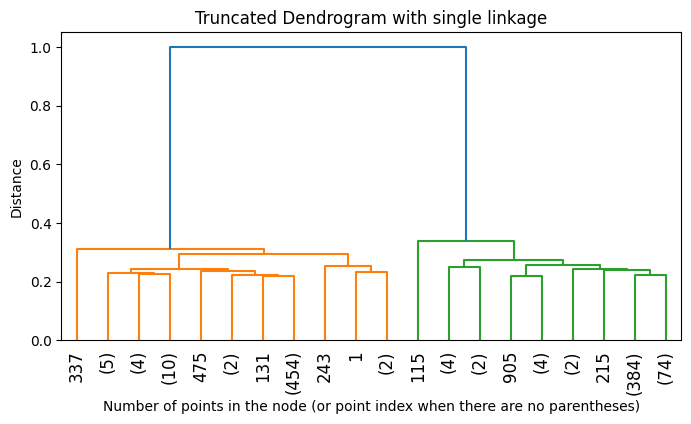

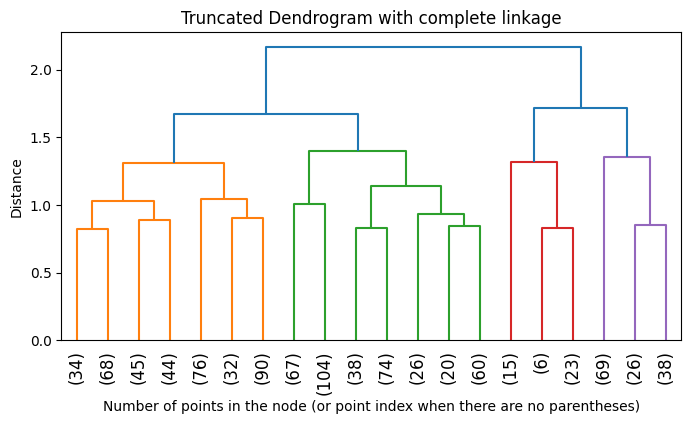

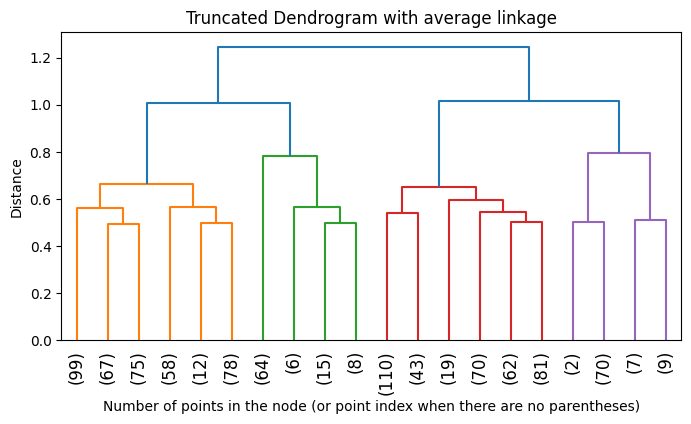

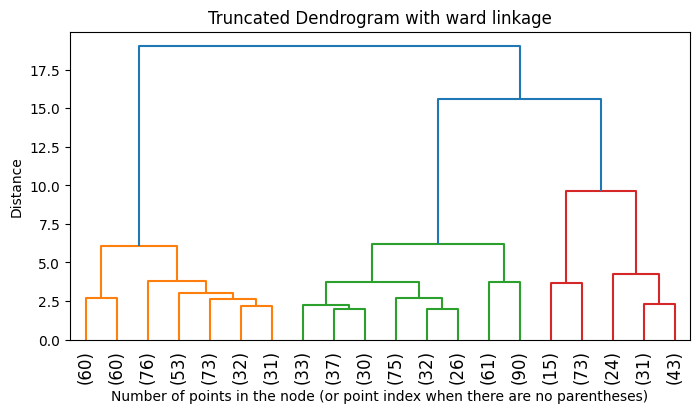

In [174]:
# truncated dendrogram with single linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_single,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with single linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with complete linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_complete,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with complete linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with average linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_average,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with average linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

# truncated dendrogram with ward linkage
plt.figure(figsize = (8, 4))
dendrogram(
    Z = dm_ward,
    p = 20,
    truncate_mode = "lastp",
    leaf_rotation = 90.0
)
plt.title('Truncated Dendrogram with ward linkage')
plt.xlabel('Number of points in the node (or point index when there are no parentheses)')
plt.ylabel('Distance')
plt.show()

### Task 4. Determine the number of clusters or the distance threshold for cutting the dendrogram

<span style="color:red">**[TBC]**</span> Determine the number of clusters or the distance threshold using multiple clustering quality evaluation metrics.

In [175]:
# [TBC] complete your code here with proper comments
# Agglomerative Clustering 
model_single = AgglomerativeClustering(n_clusters = 5, linkage = 'single').fit(X)
model_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete').fit(X)
model_average = AgglomerativeClustering(n_clusters = 5, linkage = 'average').fit(X)
model_ward = AgglomerativeClustering(n_clusters = 5, linkage = 'ward').fit(X)

In [176]:
# obtain clustering results
labeled_df = final_df.copy()
labeled_df['Cluster Single'] = model_single.labels_
labeled_df['Cluster Complete'] = model_complete.labels_
labeled_df['Cluster Average'] = model_average.labels_
labeled_df['Cluster Ward'] = model_ward.labels_
labeled_df.head()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Cluster Single,Cluster Complete,Cluster Average,Cluster Ward
0,0.34,0.635271,1.0,0.9,0.428571,0.092247,0,4,2,0
1,0.00,0.054108,0.0,0.4,0.500000,0.787425,2,2,0,2
2,0.74,0.207415,0.0,0.8,0.285714,0.025468,1,1,1,1
3,0.64,0.445892,1.0,0.6,0.071429,0.019779,0,3,2,0
4,0.90,0.427856,1.0,0.5,0.357143,0.114672,0,4,2,0


In [177]:
# get centroids of each clusters
# use the single linkage result as example
labeled_df[list(labeled_df.columns[:-3])].groupby(by = 'Cluster Single').mean()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
Cluster Single,,,,,,
0,0.504958,0.437810,1.0,0.670763,0.276029,0.103904
1,0.516855,0.451849,0.0,0.669182,0.253070,0.105615
2,0.060000,0.059619,0.0,0.350000,0.392857,0.891050
3,0.060000,0.044088,1.0,0.000000,0.857143,0.920983
4,0.000000,0.042084,0.0,0.500000,0.928571,0.724284


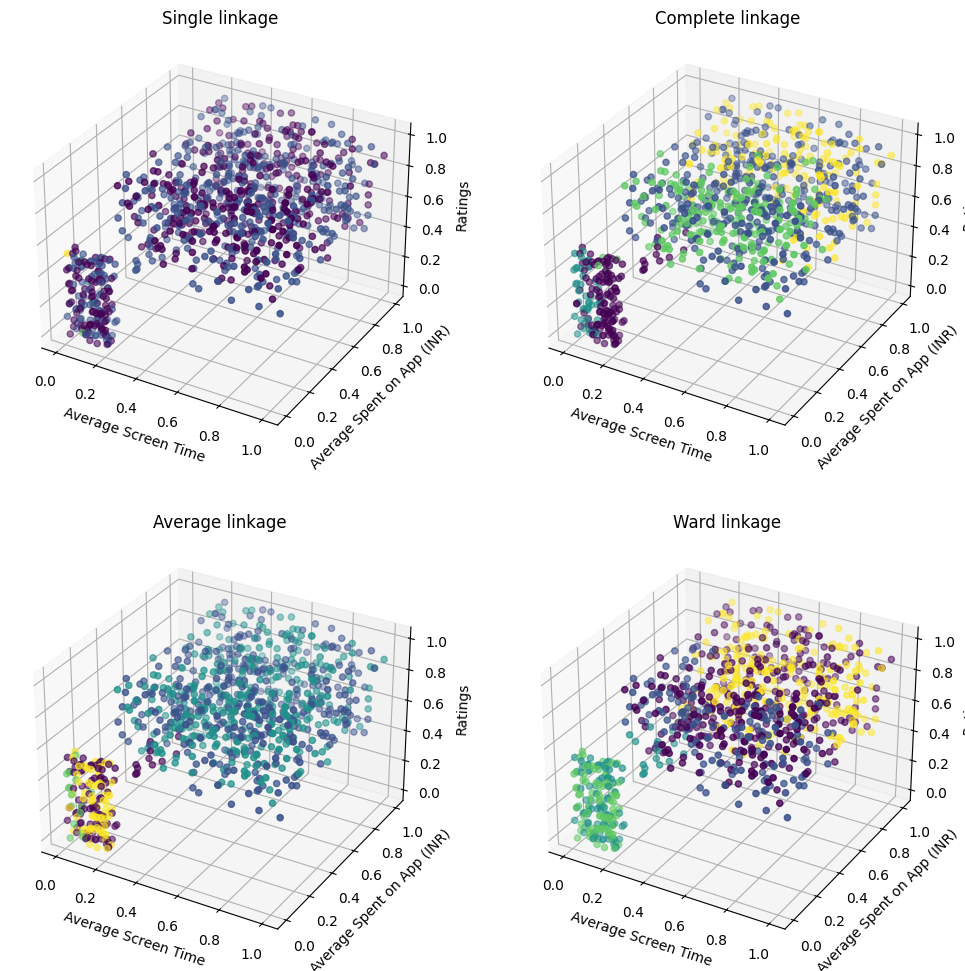

In [178]:
fig = plt.figure(figsize = [12, 12])

i = 1
subplot_title = ['Single linkage', 'Complete linkage', 'Average linkage', 'Ward linkage']
for model in [model_single, model_complete, model_average, model_ward]:
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.set_proj_type('persp')
    ax.scatter(final_df['Average Screen Time'], final_df['Average Spent on App (INR)'], final_df['Ratings'], c = model.labels_)
    ax.set_title(subplot_title[i - 1])
    ax.set_xlabel('Average Screen Time')
    ax.set_ylabel('Average Spent on App (INR)')
    ax.set_zlabel('Ratings')
    i += 1

plt.show()

In [179]:
# calculate the clustering quality evaluation metric
metric_df = pd.DataFrame(
    columns = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin index'],
    index = ['Single', 'Complete', 'Average', 'Ward']
)
metric_df['Silhouette Coefficient'] = [
    silhouette_score(X, model_single.labels_),
    silhouette_score(X, model_complete.labels_),
    silhouette_score(X, model_average.labels_),
    silhouette_score(X, model_ward.labels_)
]
metric_df['Calinski-Harabasz Index'] = [
    calinski_harabasz_score(X, model_single.labels_),
    calinski_harabasz_score(X, model_complete.labels_),
    calinski_harabasz_score(X, model_average.labels_),
    calinski_harabasz_score(X, model_ward.labels_)
]
metric_df['Davies-Bouldin index'] = [
    davies_bouldin_score(X, model_single.labels_),
    davies_bouldin_score(X, model_complete.labels_),
    davies_bouldin_score(X, model_average.labels_),
    davies_bouldin_score(X, model_ward.labels_)
]
metric_df

,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin index
Single,0.365086,214.969197,0.686757
Complete,0.318274,446.330177,1.463185
Average,0.408440,516.551163,0.852893
Ward,0.345477,580.036519,1.154135


### Task 5. Use the optimal distance threshold or number of clusters to perform agglomerative clustering and interpret the results

<span style="color:red">**[TBC]**</span> Use the conclusion of Task 4 to perform agglomerative clustering, explain the results.

In [181]:
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for threshold in range(20, 401, 10):
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = threshold).fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), silhouette, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), calinski_harabasz, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(20,401,10), davies_bouldin, '.-')
plt.xlabel('Distance threshold')
plt.ylabel('Davies-Bouldin Index')
plt.show()

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [182]:
# get the number of clusters when distance threshold = 150
model_ward = AgglomerativeClustering(n_clusters = None, linkage = 'ward', distance_threshold = 150).fit(X)
print("Number of clusters:", model_ward.n_clusters_)

Number of clusters: 1


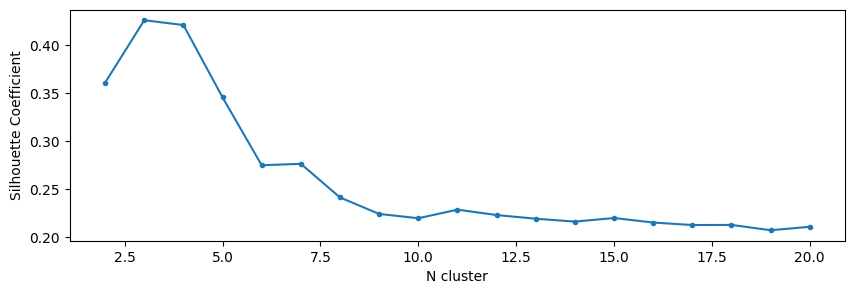

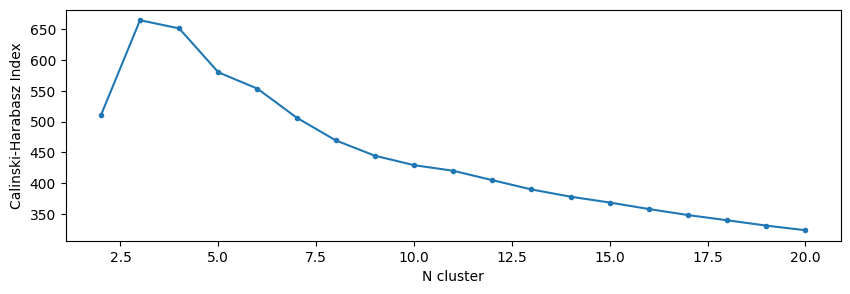

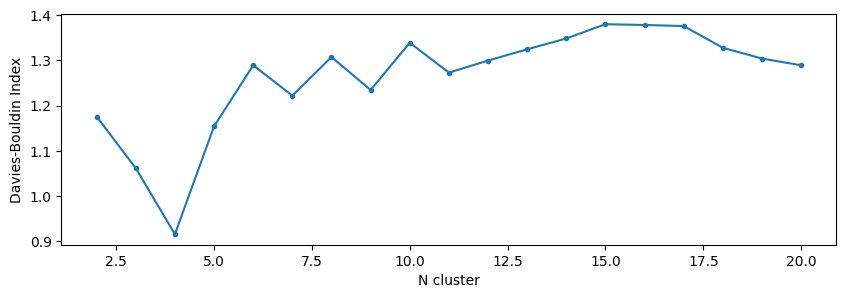

In [183]:
# create an empty list to store inertia
silhouette = []
calinski_harabasz = []
davies_bouldin = []

# test different number of clusters
for n in range(2, 21):
    # ward linkage
    model_ward = AgglomerativeClustering(n_clusters = n, linkage = 'ward').fit(X)
    silhouette.append(silhouette_score(X, model_ward.labels_))
    calinski_harabasz.append(calinski_harabasz_score(X, model_ward.labels_))
    davies_bouldin.append(davies_bouldin_score(X, model_ward.labels_))

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), silhouette, '.-')
plt.xlabel('N cluster')
plt.ylabel('Silhouette Coefficient')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), calinski_harabasz, '.-')
plt.xlabel('N cluster')
plt.ylabel('Calinski-Harabasz Index')
plt.show()

plt.figure(figsize = (10, 3))
plt.plot(range(2, 21), davies_bouldin, '.-')
plt.xlabel('N cluster')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [184]:
model_single = AgglomerativeClustering(n_clusters = 3, linkage = 'single').fit(X)
model_complete = AgglomerativeClustering(n_clusters = 3, linkage = 'complete').fit(X)
model_average = AgglomerativeClustering(n_clusters = 3, linkage = 'average').fit(X)
model_ward = AgglomerativeClustering(n_clusters = 3, linkage = 'ward').fit(X)

In [185]:
# obtain clustering results
labeled_df = final_df.copy()
labeled_df['Cluster Single'] = model_single.labels_
labeled_df['Cluster Complete'] = model_complete.labels_
labeled_df['Cluster Average'] = model_average.labels_
labeled_df['Cluster Ward'] = model_ward.labels_
labeled_df.head()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes,Cluster Single,Cluster Complete,Cluster Average,Cluster Ward
0,0.34,0.635271,1.0,0.9,0.428571,0.092247,2,0,2,1
1,0.00,0.054108,0.0,0.4,0.500000,0.787425,0,2,0,0
2,0.74,0.207415,0.0,0.8,0.285714,0.025468,0,0,0,2
3,0.64,0.445892,1.0,0.6,0.071429,0.019779,2,0,2,1
4,0.90,0.427856,1.0,0.5,0.357143,0.114672,2,0,2,1


In [186]:
# use the single linkage result as example
labeled_df[list(labeled_df.columns[:-3])].groupby(by = 'Cluster Single').mean()

,Average Screen Time,Average Spent on App (INR),Left Review,Ratings,New Password Request,Last Visited Minutes
Cluster Single,,,,,,
0,0.511992,0.447744,0.0,0.666183,0.255631,0.113417
1,0.060000,0.044088,1.0,0.000000,0.857143,0.920983
2,0.504958,0.437810,1.0,0.670763,0.276029,0.103904


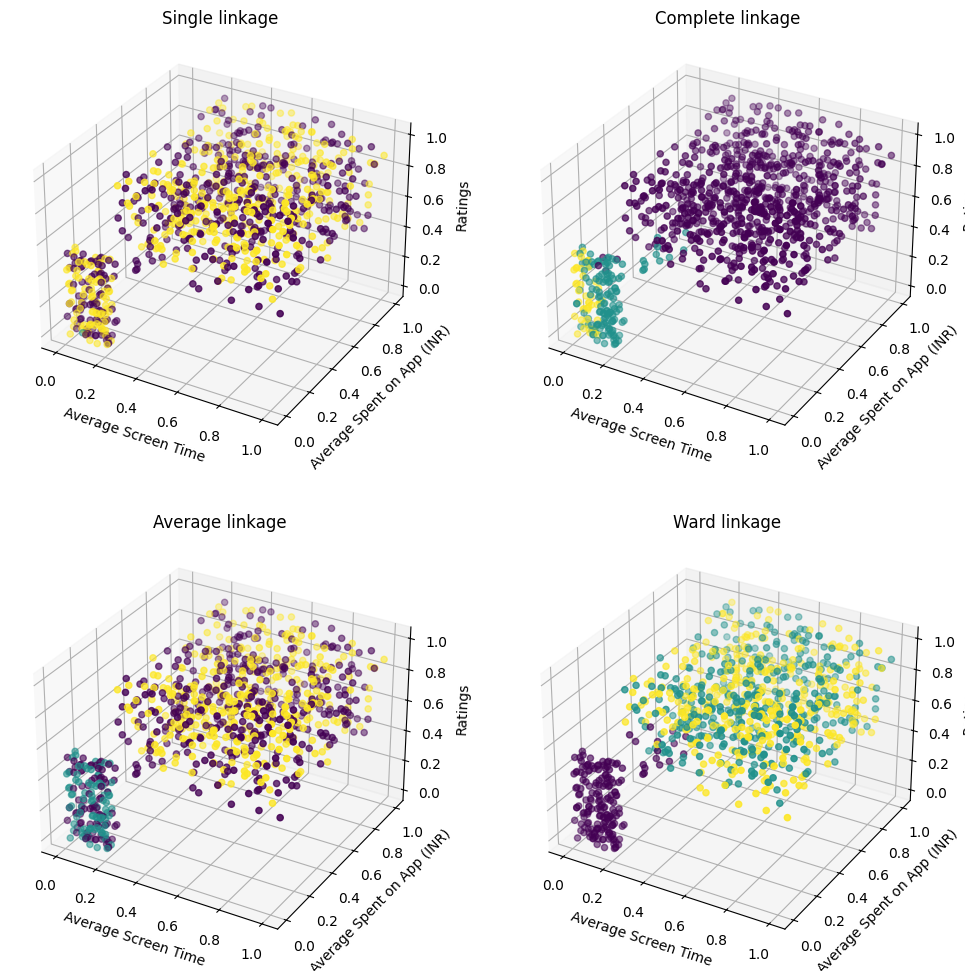

In [187]:
fig = plt.figure(figsize = [12, 12])

i = 1
subplot_title = ['Single linkage', 'Complete linkage', 'Average linkage', 'Ward linkage']
for model in [model_single, model_complete, model_average, model_ward]:
    ax = fig.add_subplot(2, 2, i, projection='3d')
    ax.set_proj_type('persp')
    ax.scatter(final_df['Average Screen Time'], final_df['Average Spent on App (INR)'], final_df['Ratings'], c = model.labels_)
    ax.set_title(subplot_title[i - 1])
    ax.set_xlabel('Average Screen Time')
    ax.set_ylabel('Average Spent on App (INR)')
    ax.set_zlabel('Ratings')
    i += 1

plt.show()

In [188]:
# calculate the clustering quality evaluation metric
metric_df = pd.DataFrame(
    columns = ['Silhouette Coefficient', 'Calinski-Harabasz Index', 'Davies-Bouldin index'],
    index = ['Single', 'Complete', 'Average', 'Ward']
)
metric_df['Silhouette Coefficient'] = [
    silhouette_score(X, model_single.labels_),
    silhouette_score(X, model_complete.labels_),
    silhouette_score(X, model_average.labels_),
    silhouette_score(X, model_ward.labels_)
]
metric_df['Calinski-Harabasz Index'] = [
    calinski_harabasz_score(X, model_single.labels_),
    calinski_harabasz_score(X, model_complete.labels_),
    calinski_harabasz_score(X, model_average.labels_),
    calinski_harabasz_score(X, model_ward.labels_)
]
metric_df['Davies-Bouldin index'] = [
    davies_bouldin_score(X, model_single.labels_),
    davies_bouldin_score(X, model_complete.labels_),
    davies_bouldin_score(X, model_average.labels_),
    davies_bouldin_score(X, model_ward.labels_)
]
metric_df

,Silhouette Coefficient,Calinski-Harabasz Index,Davies-Bouldin index
Single,0.405704,412.401739,0.791600
Complete,0.245144,150.066743,1.569760
Average,0.416948,625.208098,0.883060
Ward,0.425932,664.479243,1.061432
